<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Handling-rs-fMRIs" data-toc-modified-id="Handling-rs-fMRIs-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Handling rs-fMRIs</a></span><ul class="toc-item"><li><span><a href="#Specify-the-filename" data-toc-modified-id="Specify-the-filename-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Specify the filename</a></span></li><li><span><a href="#Load-the-file" data-toc-modified-id="Load-the-file-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Load the file</a></span></li></ul></li><li><span><a href="#Explore-the-image" data-toc-modified-id="Explore-the-image-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Explore the image</a></span></li><li><span><a href="#Scrolling-through-the-image-volume" data-toc-modified-id="Scrolling-through-the-image-volume-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Scrolling through the image volume</a></span></li></ul></div>

# Imports

In [21]:
from __future__ import print_function  # ensures print function compatibility with Python3
import numpy as np

# safely deal with file paths
import os

# library for loading the image
from nipy.core.api import Image          # for Image object
from nipy import load_image, save_image  # for loading and saving .nii.gz images
from nipype.interfaces import dcmstack   # for saving the file

# library for viewing the image
import matplotlib.pyplot as plt

# Handling rs-fMRIs

## Specify the filename

In [5]:
# Specify the path to the file
path = "BOLD.nii"
path = os.path.abspath(path)
print(path)  # Python3 syntax for printing

# Make sure that the file exists and is actually a file
if not os.path.exists(path) or not os.path.isfile(path):
    print("The filename entered is invalid")

/home/jenna/Documents/Pitt/CHP-PIRC/BOLD_motion_simulation/BOLD.nii


## Load the file

In [12]:
sequence = load_image(path)

# What is the type() of the image?
# your code here

# Get the coordinates of the image - will be used later to make sure all volumes 
# in the sequence are in the same space
coords = sequence.coordmap

In [17]:
# Can grab the data directly from the sequence
sequenceData = sequence.get_data()

# What does the sequenceData object look like? 
# your code here

# What type() of object is the data?
# your code here

# What is the shape of the data? (Hint: the object should have an attribute called .shape)
# your code here

# Based on the output of the previous line, how many dimensions 
# are used to store the information in the image sequence?

# Explore the image

In [20]:
# Rather than try to deal with the sequence data directly, 
# is there a way to look at it one volume at a time? (yes)
for i in range(sequence.get_data().shape[3]):
    print(i, sequence[:,:,:,i].shape)

0 (64, 64, 32)
1 (64, 64, 32)
2 (64, 64, 32)
3 (64, 64, 32)
4 (64, 64, 32)
5 (64, 64, 32)
6 (64, 64, 32)
7 (64, 64, 32)
8 (64, 64, 32)
9 (64, 64, 32)
10 (64, 64, 32)
11 (64, 64, 32)
12 (64, 64, 32)
13 (64, 64, 32)
14 (64, 64, 32)
15 (64, 64, 32)
16 (64, 64, 32)
17 (64, 64, 32)
18 (64, 64, 32)
19 (64, 64, 32)
20 (64, 64, 32)
21 (64, 64, 32)
22 (64, 64, 32)
23 (64, 64, 32)
24 (64, 64, 32)
25 (64, 64, 32)
26 (64, 64, 32)
27 (64, 64, 32)
28 (64, 64, 32)
29 (64, 64, 32)
30 (64, 64, 32)
31 (64, 64, 32)
32 (64, 64, 32)
33 (64, 64, 32)
34 (64, 64, 32)
35 (64, 64, 32)
36 (64, 64, 32)
37 (64, 64, 32)
38 (64, 64, 32)
39 (64, 64, 32)
40 (64, 64, 32)
41 (64, 64, 32)
42 (64, 64, 32)
43 (64, 64, 32)
44 (64, 64, 32)
45 (64, 64, 32)
46 (64, 64, 32)
47 (64, 64, 32)
48 (64, 64, 32)
49 (64, 64, 32)
50 (64, 64, 32)
51 (64, 64, 32)
52 (64, 64, 32)
53 (64, 64, 32)
54 (64, 64, 32)
55 (64, 64, 32)
56 (64, 64, 32)
57 (64, 64, 32)
58 (64, 64, 32)
59 (64, 64, 32)
60 (64, 64, 32)
61 (64, 64, 32)
62 (64, 64, 32)
63

(64, 64, 32)


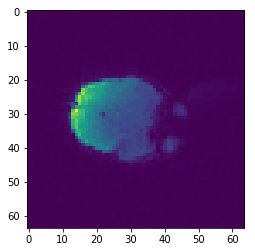

In [31]:
# Let's start by looking at the first volume in the sequence, volume 0
imageVolume = sequence.get_data()[:,:,:,0]
print(imageVolume.shape)

# The image is a rectangular prism. The length and width are the same,
# and the height varies. It's hard to see the whole image in 3D, so look 
# at some individual 2D slices of the 3D volume
sliceNumber = 13
plt.imshow(imageVolume[:, :, sliceNumber]) 

# Anatomy of slice 12: we're looking at the axial plane of the brain (https://en.wikipedia.org/wiki/Anatomical_terms_of_location#Planes)
# The patient is facing to the right. The two blobs at (40, 40) and (45, 28) are the eyes. 
# The brain is behind the eyes. 

# Look through a few more slices. Are the eyes always present in the same amount in each plane?

# Scrolling through the image volume

Rerunning the previous cell gets tedius. There is a way to manipulate the plot using buttons on the keyboard. This can be done using the matplotlib event handler API.

Switch to the file `image_viewer.py` and run it. Its purpose is to display a matplotlib figure showing a single slice of the first volume. 

After running it, read through it. How could this code be modified to change the volume in addition to the slice?